In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from joblib import dump, load

consumption=pd.read_csv('measurements.csv')
consumption['distance']=consumption['distance'].str.replace(',','.').astype(float)
consumption['consume']=consumption['consume'].str.replace(',','.').astype(float)
consumption['temp_inside']=consumption['temp_inside'].str.replace(',','.').astype(float)
consumption

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [36]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     13 non-null     object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [37]:
data=consumption.drop(['specials','temp_outside','refill liters','refill gas'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   distance     388 non-null    float64
 1   consume      388 non-null    float64
 2   speed        388 non-null    int64  
 3   temp_inside  376 non-null    float64
 4   gas_type     388 non-null    object 
 5   AC           388 non-null    int64  
 6   rain         388 non-null    int64  
 7   sun          388 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 24.4+ KB


In [38]:
data['temp_inside']=data['temp_inside'].fillna(data['temp_inside'].mean())
data.describe()

,distance,consume,speed,temp_inside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.994666,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,1.000000,1.000000,1.000000


In [39]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
data['gas_type']=lr.fit_transform(data['gas_type'])
# data['distance']=data['distance'].astype(int)
# data['consume']=data['consume'].astype(int)
# data['temp_inside']=data['temp_inside'].astype(int)
data

,distance,consume,speed,temp_inside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,0,0,0,0
1,12.0,4.2,30,21.5,0,0,0,0
2,11.2,5.5,38,21.5,0,0,0,0
3,12.9,3.9,36,21.5,0,0,0,0
4,18.5,4.5,46,21.5,0,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,1,0,0,0
384,16.1,4.3,38,25.0,1,1,0,0
385,16.0,3.8,45,25.0,1,0,0,0
386,15.4,4.6,42,25.0,1,1,0,0


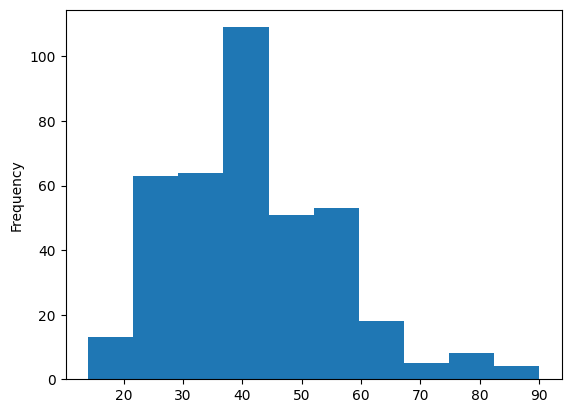

In [40]:
data['speed'].plot.hist()
plt.show()

In [41]:
x=data.drop('consume',axis=1)
y=data.iloc[:,1]
y

0      5.0
1      4.2
2      5.5
3      3.9
4      4.5
      ... 
383    3.7
384    4.3
385    3.8
386    4.6
387    5.0
Name: consume, Length: 388, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)
x_train.to_csv('x_train.csv',index=False)


In [43]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_trainmn=mms.fit_transform(x_train)
x_testmn=mms.transform(x_test)

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trainstd=ss.fit_transform(x_train)
x_teststd=ss.transform(x_test)

In [45]:
from sklearn.decomposition import PCA
pc=PCA(n_components=5)
x_trainpca=pc.fit_transform(x_train)
x_testpca=pc.transform(x_test)

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor(max_depth=3,random_state=56)
dt1.fit(x_train,y_train)
dump(dt1, 'decision_tree_model_normal.pkl')
pred1=dt1.predict(x_test)
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred1)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test,pred1))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, pred1))

Root Mean Squared Error(RMSE): 1.1362049787561657
Mean Absolute Error(MAE): 0.6896647745976586
Mean Squared Error(MSE): 1.2909617537502986


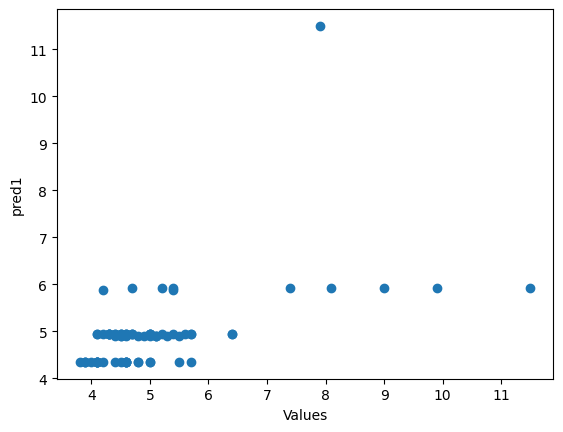

In [47]:
plt.scatter(y_test,pred1)
plt.xlabel('Values')
plt.ylabel('pred1')
plt.show()

In [48]:
from sklearn.tree import DecisionTreeRegressor
dt2=DecisionTreeRegressor(max_depth=3,random_state=56)
dt2.fit(x_trainmn,y_train)
dump(dt2, 'decision_tree_model_minmax.pkl')
pred2=dt2.predict(x_testmn)
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test,pred2))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, pred2))

Root Mean Squared Error(RMSE): 1.1362049787561657
Mean Absolute Error(MAE): 0.6896647745976586
Mean Squared Error(MSE): 1.2909617537502986


In [49]:
from sklearn.tree import DecisionTreeRegressor
dt3=DecisionTreeRegressor(max_depth=3,random_state=56)
dt3.fit(x_trainstd,y_train)
dump(dt3, 'decision_tree_model_standard.pkl')
pred3=dt3.predict(x_teststd)
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred3)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test,pred3))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, pred3))

Root Mean Squared Error(RMSE): 1.1362049787561657
Mean Absolute Error(MAE): 0.6896647745976586
Mean Squared Error(MSE): 1.2909617537502986


In [50]:
from sklearn.tree import DecisionTreeRegressor
dt4=DecisionTreeRegressor(max_depth=3,random_state=56)
dt4.fit(x_trainpca,y_train)
dump(dt4, 'decision_tree_model_pca.pkl')
pred4=dt4.predict(x_testpca)
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred4)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test,pred4))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, pred4))

Root Mean Squared Error(RMSE): 1.0853615044843725
Mean Absolute Error(MAE): 0.6802657484248339
Mean Squared Error(MSE): 1.1780095954165806


In [51]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=5, random_state=50,criterion='entropy',max_depth=4)

model1.fit(x_train, y_train)
dump(model1, 'random_forest_model_normal.pkl')
pred5=model1.predict(x_test)
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred5)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test,pred5))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, pred5))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4= RandomForestClassifier(n_estimators=5, random_state=50,criterion='entropy',max_depth=4)

model4.fit(x_trainpca, y_train)
dump(model4, 'random_forest_model_pca.pkl')
pred6=model4.predict(x_testpca)
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred6)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test,pred6))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, pred6))

In [ ]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression() 
lnr.fit(x_train,y_train)
dump(lnr, 'lỉnear_regression_model_normal.pkl')
pd=lnr.predict(x_test)
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pd)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, pd))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, pd))

In [ ]:
# from sklearn.linear_model import LinearRegression
# lnr1=LinearRegression()
# lnr1.fit(x_trainmn,y_train)
# dump(lnr1, 'lỉnear_regression_model_minmax.pkl')
# pd1=lnr.predict(x_testmn)
# print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pd1)))
# print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, pd1))
# print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, pd1))

In [ ]:
# from sklearn.linear_model import LinearRegression
# lnr2=LinearRegression()
# lnr2.fit(x_trainstd,y_train)
# dump(lnr2, 'lỉnear_regression_model_standard.pkl')
# pd2=lnr2.predict(x_teststd)
# print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pd2)))
# print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, pd2))
# print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, pd2))

In [ ]:
# from sklearn.linear_model import LinearRegression
# lnr3=LinearRegression()
# lnr3.fit(x_trainpca,y_train)
# dump(lnr3, 'lỉnear_regression_model_pca.pkl')
# pd3=lnr3.predict(x_testpca)
# print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pd3)))
# print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, pd3))
# print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, pd3))